In [1]:
import pandas as pd
import numpy as np

data visualisation tools

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

##Import ML lib

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


##Data Preprocessing

In [6]:
df=pd.read_csv('wine_quality.csv')
df

,quality_score,wine_type,alcohol,citric_acid,density,ph,residual_sugar,total_sulfur_dioxide,fixed_acidity
0,7.06,white,12.9,0.26,0.99080,3.08,9.7,102.0,6.2
1,4.27,white,9.5,0.09,0.99566,2.93,10.9,131.0,6.6
2,6.35,white,9.6,0.23,0.99450,3.34,6.2,117.0,6.7
3,7.08,white,13.4,0.24,0.98934,3.04,6.1,86.0,6.2
4,5.75,white,9.5,0.24,0.99420,2.99,3.6,85.0,6.9
...,...,...,...,...,...,...,...,...,...
1653,7.61,red,10.9,0.07,0.99632,3.38,2.5,9.0,7.5
1654,6.48,white,9.9,0.34,0.99340,3.18,2.3,214.0,7.4
1655,6.47,white,9.9,0.30,0.99436,3.20,6.7,125.0,7.0
1656,6.50,red,9.9,0.21,0.99560,3.27,2.2,133.0,7.7


In [7]:
df.describe()

,quality_score,alcohol,citric_acid,density,ph,residual_sugar,total_sulfur_dioxide,fixed_acidity
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,7.163709,10.466972,0.310374,0.995086,3.234306,4.958745,102.116104,7.406634
std,1.124374,1.170635,0.152834,0.002911,0.165411,4.518301,58.578130,1.455560
min,4.000000,8.400000,0.000000,0.987130,2.800000,0.700000,6.000000,3.800000
25%,6.412500,9.500000,0.230000,0.992800,3.120000,1.800000,50.000000,6.500000
50%,7.130000,10.300000,0.310000,0.995440,3.230000,2.600000,103.000000,7.100000
75%,7.920000,11.300000,0.400000,0.997295,3.340000,7.200000,144.000000,8.000000
max,10.000000,14.900000,0.810000,1.003690,4.010000,26.050000,440.000000,15.900000


In [8]:
df.isna().count()

quality_score           1658
wine_type               1658
alcohol                 1658
citric_acid             1658
density                 1658
ph                      1658
residual_sugar          1658
total_sulfur_dioxide    1658
fixed_acidity           1658
dtype: int64

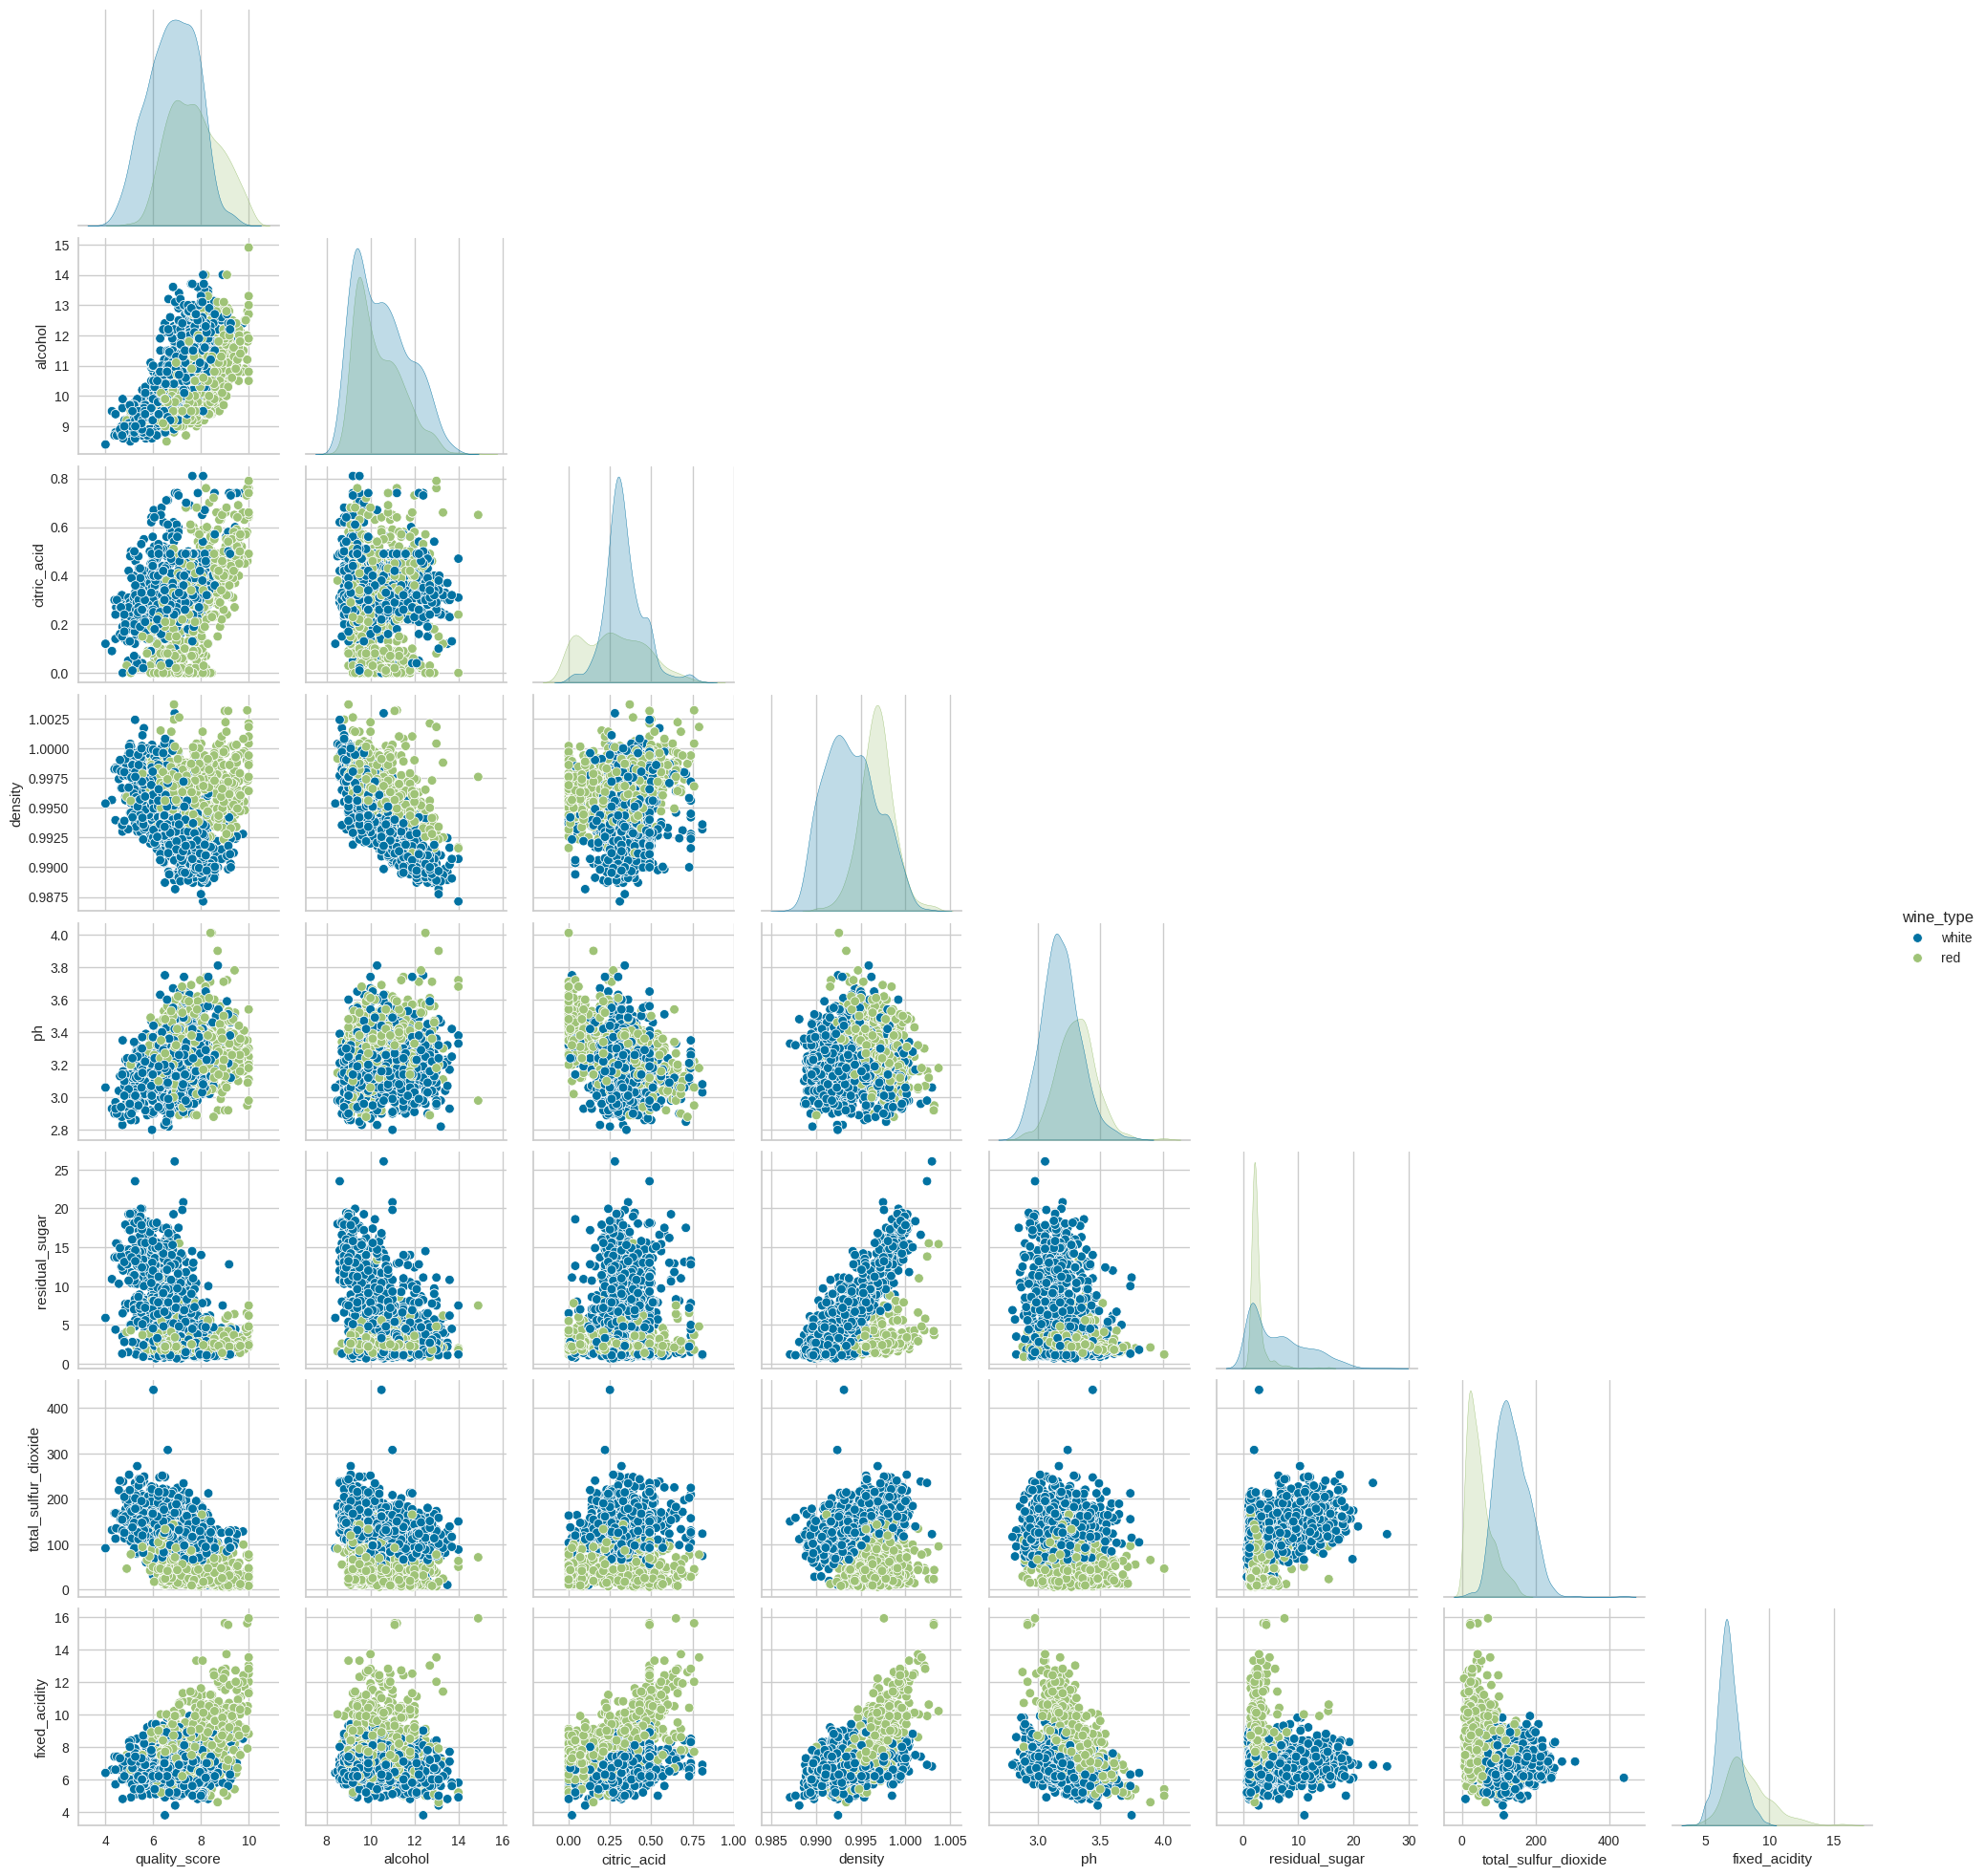

In [9]:
sns.pairplot(
    df,hue="wine_type",corner=True
)

#sns sublot

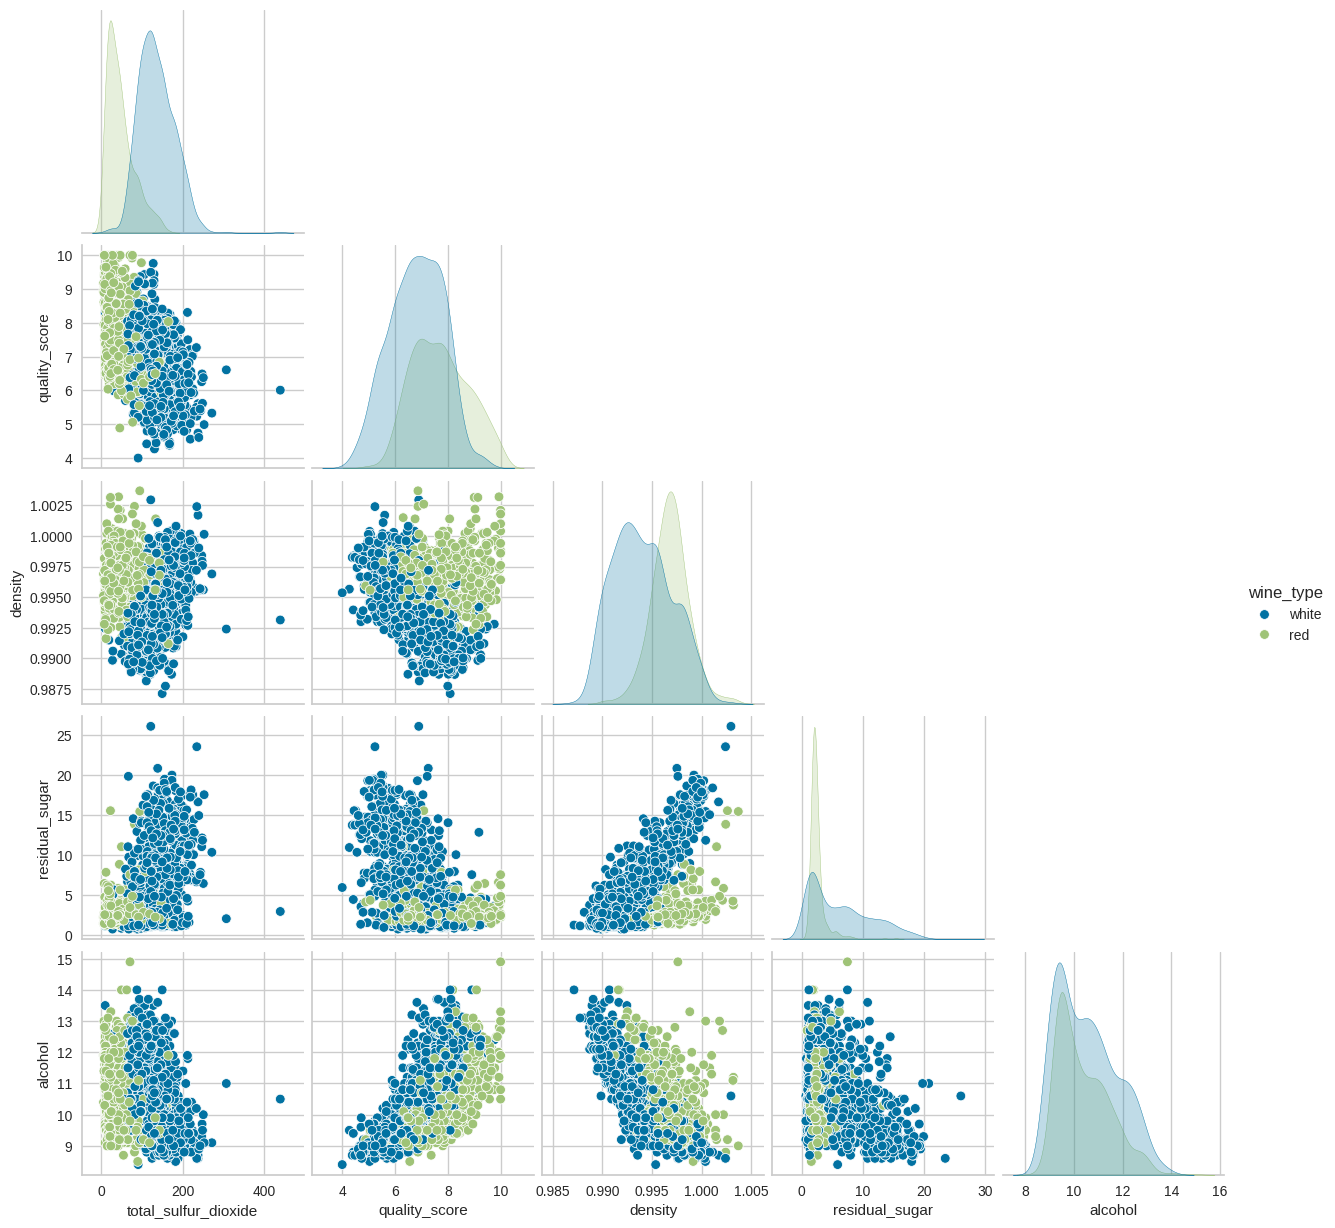

In [10]:
sns.pairplot(
    df,hue="wine_type",corner=True,vars={'quality_score','alcohol','residual_sugar','density','total_sulfur_dioxide'}
)

In [26]:
wine_corr_df=(
    df.corr()
)
wine_corr_df

<ipython-input-26-6e4e13f16daa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,quality_score,alcohol,citric_acid,density,ph,residual_sugar,total_sulfur_dioxide,fixed_acidity
quality_score,1.000000,0.643038,0.397868,-0.172958,0.331117,-0.527793,-0.537565,0.404207
alcohol,0.643038,1.000000,0.032872,-0.658394,0.131129,-0.317174,-0.232249,-0.096020
citric_acid,0.397868,0.032872,1.000000,0.068643,-0.385378,0.123754,0.187089,0.365093
density,-0.172958,-0.658394,0.068643,1.000000,0.020054,0.417746,-0.075794,0.528207
ph,0.331117,0.131129,-0.385378,0.020054,1.000000,-0.317104,-0.275672,-0.245524
residual_sugar,-0.527793,-0.317174,0.123754,0.417746,-0.317104,1.000000,0.522030,-0.154484
total_sulfur_dioxide,-0.537565,-0.232249,0.187089,-0.075794,-0.275672,0.522030,1.000000,-0.356858
fixed_acidity,0.404207,-0.096020,0.365093,0.528207,-0.245524,-0.154484,-0.356858,1.000000


<Axes: >

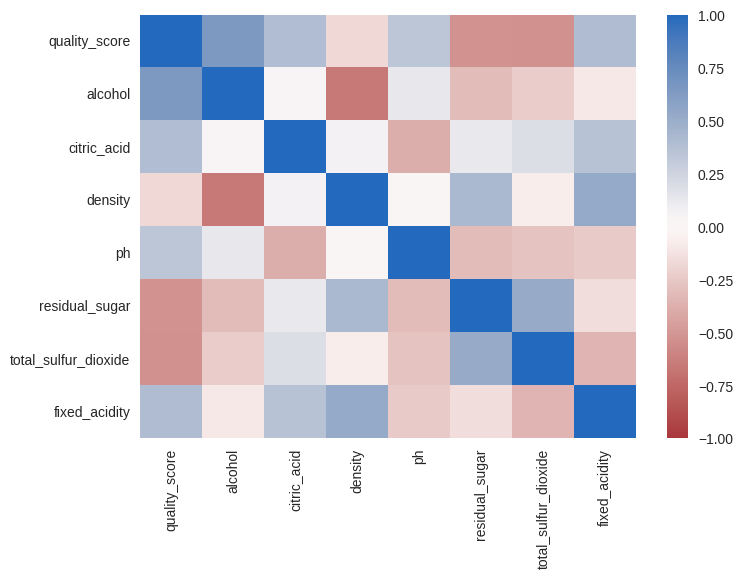

In [27]:
sns.heatmap(wine_corr_df,cmap='vlag_r',vmin=-1,vmax=1)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["alcohol"]],
    df["quality_score"].values,
    train_size = 0.8,
    random_state=314
)

##Linear regression model

In [57]:
wine_lm = LinearRegression()
wine_lm.fit(x_train,y_train)

LinearRegression()

##Model prediction



In [58]:
y_train_pred = wine_lm.predict(x_train)
y_test_pred = wine_lm.predict(x_test)
pd.DataFrame({
    'quality_score': y_test,
    'predicted_qualuty_score': np.round( y_test_pred,2)
})

,quality_score,predicted_qualuty_score
0,9.18,8.25
1,6.66,7.49
2,7.34,6.92
3,6.42,7.17
4,5.34,6.22
...,...,...
327,6.05,6.54
328,5.86,6.35
329,9.44,7.74
330,8.20,6.48


In [59]:
from yellowbrick.regressor import ResidualsPlot,PredictionError

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


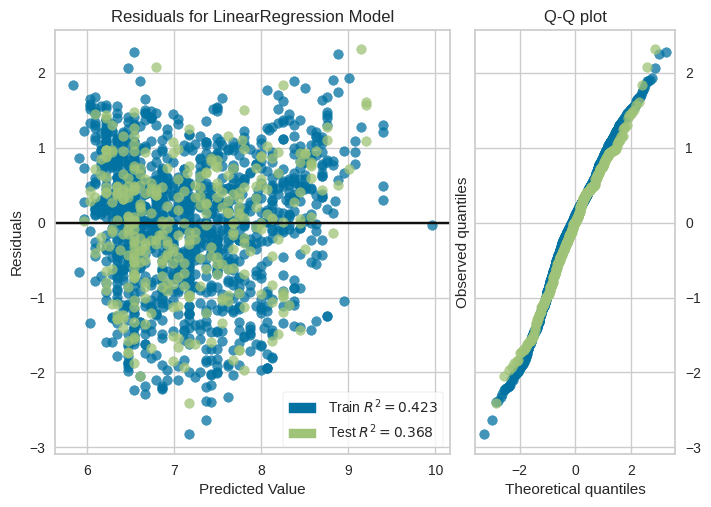

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [60]:
visualizer = ResidualsPlot(wine_lm,hist=False, qqplot=True)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


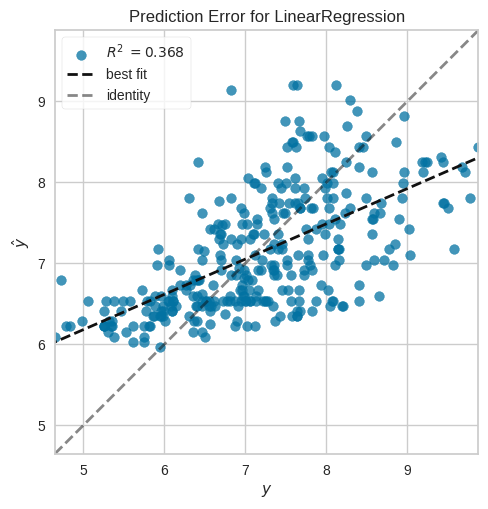

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [61]:
visualizer = PredictionError(wine_lm)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()